<a href="https://colab.research.google.com/github/HariKrishnanKumarakrishnan/CharacterDetectionUsingComputerVision/blob/main/Anime_Character_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
! cp kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [21]:
! kaggle datasets download shanmukh05/anime-names-and-image-generation

100% 1.89G/1.90G [00:53<00:00, 65.5MB/s]
100% 1.90G/1.90G [00:53<00:00, 37.8MB/s]


In [22]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile
from zipfile import ZipFile
from PIL import Image
zip_path='/content/anime-names-and-image-generation.zip'
with zipfile.ZipFile(zip_path) as z:
  z.extractall(".")
  files_in_zip = z.namelist()
len(files_in_zip)

In [12]:
import os.path, sys
import Image
path = "/content/dataset/dataset"
dirs = os.listdir(path)
def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)         #corrected
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imCrop = im.crop((0, 0, 224, 224)) #corrected
            rgb_im = imCrop.convert('RGB')
            imCrop.save(f + 'Cropped.bmp', "BMP", quality=100)
            os.remove(fullpath)

crop()

UnidentifiedImageError: ignored

dataset/dataset/A_Yeong_Gang.jpg


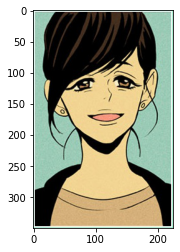

In [ ]:
with ZipFile(zip_path) as myzip:
  with myzip.open(files_in_zip[4]) as myfile:
    plt.imshow(mpimg.imread(myfile))
    print(myfile.name)


In [ ]:
#import pathlib
#import glob
#import urllib.request
#from tqdm import tqdm
#import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
import keras
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
print(tf.__version__)
print(tf.keras.__version__)
from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


1.15.2
2.2.4-tf
Mounted at /content/gdrive


In [ ]:
def getCharacterName(myfile):
  fname = myfile.name
  fname.replace('dataset/dataset','')
  fname.replace('_', '')
  return fname 
model = keras.applications.



Instructions for updating:
If using Keras pass *_constraint arguments to layers.

553467904/553467096 [==============================] - 4s 0us/step


In [ ]:
!nvidia-smi

Thu Jul 29 17:05:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |   1502MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
def load_image(path):
  img = image.load_img(path, target_size=model.input_shape[1:3])
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  return img, x


shape:  (1, 224, 224, 3)
dtype:  float32


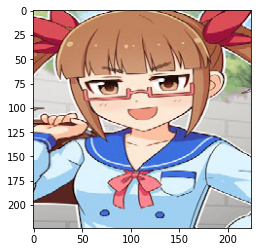

In [ ]:
img, x = load_image("/content/dataset/dataset/Akiha_Ikebukuro.jpg")
print("shape: ", x.shape)
print("dtype: ", x.dtype)
plt.imshow(img)